# Linear Regression Models and Regularisation

Here, we will be exploring linear regression models, namely OLS, Ridge, Lasso and Elastic-Net Regressions. We main to gain a better understanding of how an OLS model will fit the given dataset as well as how regularisation can potential reduce the complexity of the model through feature selections without losing much predictive power.

We will be comparing the different models predictive ability using their R-squared and Mean Squared Error values.
We will also compare the different models by their complexity and number of features.

Data Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

%matplotlib inline

In [2]:
df_train = pd.read_csv('df_train.csv')

In [3]:
df_train = df_train.drop('Unnamed: 0', axis = 1).set_index('Id').drop(1, axis = 0)
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
2,4.110874,9.042040,6,1.791759,7.602900,7.602900,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
3,3.044522,9.169623,7,2.197225,7.589336,7.589336,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
4,4.110874,9.328212,7,1.791759,7.601902,7.602401,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,1,0,0,0,0,0
5,4.262680,9.164401,8,1.791759,7.557995,7.586296,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,0,0,0,0,1,0
6,4.110874,9.565284,5,1.791759,7.601402,7.601402,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 2 to 1460
Columns: 225 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(27), int64(198)
memory usage: 2.5 MB


## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate

In [6]:
df_num = pd.read_csv('df_num.csv')
df_num = df_num.set_index('Id')

In [7]:
scaler = StandardScaler()
df_train[df_num.columns] = scaler.fit_transform(df_train[df_num.columns])

C:\Users\Chua\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Chua\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('SalePrice', axis=1), df_train['SalePrice'], test_size = 0.3)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Scores

In [10]:
cv_results = cross_validate(lin_reg, x_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score = True)
for i in cv_results:
    print(i, ':', cv_results[i])

fit_time : [0.0449729  0.03997731 0.05296993 0.03397989 0.04197574]
score_time : [0.00799632 0.00799537 0.00599599 0.00599599 0.0059967 ]
test_r2 : [-1.03952785e+20 -4.34660515e+20 -8.37320018e+16 -3.83478257e+18
 -5.73082427e+20]
train_r2 : [0.86530547 0.87982528 0.87936964 0.87093328 0.86912465]
test_neg_mean_squared_error : [-9.82042469e+19 -4.33450170e+20 -9.53148985e+16 -3.63648870e+18
 -5.77113564e+20]
train_neg_mean_squared_error : [-0.13814911 -0.12189746 -0.11789376 -0.13232218 -0.13230886]


From the cross validation results, we can clearly see that the model fits the training dataset well but often does not fit the validation dataset. As such, we need to investigate further into what is causing this issue.
Firstly, we investigate the training dataset to ensure that the model at least fits it well.

In [11]:
print('R_squared for training data:' , lin_reg.score(x_train, y_train))

R_squared for training data: 0.8659086580134557


In [12]:
lin_reg_pred = lin_reg.predict(x_train)

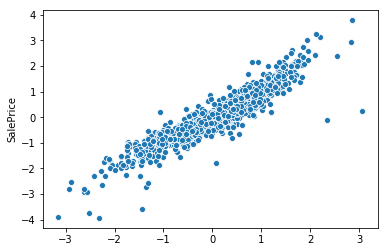

Text(0, 0.5, 'Residuals')

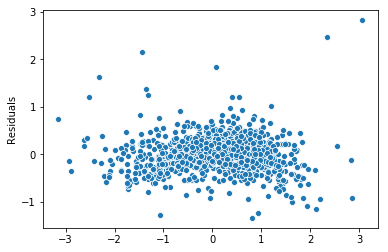

In [13]:
se.scatterplot(lin_reg_pred, y_train)
plt.show()
se.scatterplot(lin_reg_pred, lin_reg_pred-y_train)
plt.ylabel('Residuals')

In [14]:
print('Residual\'s Mean:', (lin_reg_pred-y_train).mean())

Residual's Mean: -2.5046187430124237e-05


As we can see, the model has a high r-squared value which represents that the variables can explain the sale prices well. This is further illustrated in the SalesPrice vs. Predicted value scatter plot. The Residuals plot also has a mean close to 0 and are roughly randomly scattered about the mean. This shows that the model has captured a large amount of information from the dataset and used in its prediction.

Next, we look at the test dataset to investigate why this results is not translated to it.

In [15]:
print('R Squared for test data:', lin_reg.score(x_test, y_test))

R Squared for test data: -4.290691811427944e+19


In [16]:
lin_pred_test = lin_reg.predict(x_test)

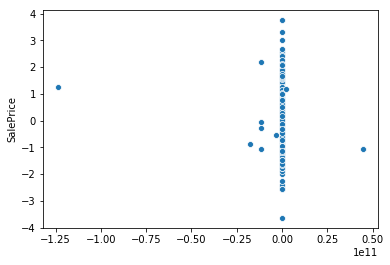

In [17]:
se.scatterplot(lin_pred_test, y_test)
plt.show()

In [18]:
print('Prediction mean:', lin_pred_test.mean())

Prediction mean: -333690974.8423042


From the plot above, we can see that the scale of the predicted values are a little weird in the sense that there are extremely large values. This could be possibly caused by certain outliers or that the data wasn't properly translated into a scale that is suitable for this model.

As such, for the time being, we will remove the large values to investigate if the remaining values are a good fit for the model.

In [58]:
large_values = np.where(abs(lin_pred_test) > 5)
lin_pred_test1 = np.delete(lin_pred_test, large_values)
y_test1 = y_test.to_numpy()
y_test1 = np.delete(y_test1, large_values)

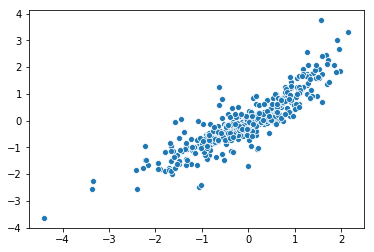

Text(0, 0.5, 'Residuals')

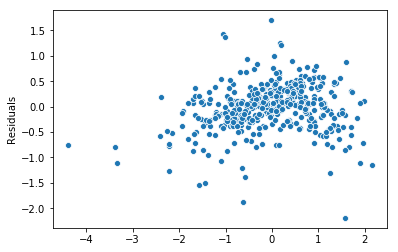

In [59]:
se.scatterplot(lin_pred_test1, y_test1)
plt.show()
se.scatterplot(lin_pred_test1, lin_pred_test1-y_test1)
plt.ylabel('Residuals')

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
print('New R2 Values:', np.corrcoef(lin_pred_test1, y_test1)[0][1]**2)
print('MSE:', mean_squared_error(lin_pred_test1, y_test1))

New R2 Values: 0.7917910564090654
MSE: 0.2083456441062274


Here we see that the performance increased drastically, matching the results we see from the training dataset. This shows that the model effectively captures the vital information from the dataset and is able to replicate its results on dataset that it has not seen before. However, we have to further investigate the cause of the large values to create a more complete model.

As such, we investigate the coefficient of each variable.

In [62]:
for i in zip(x_train.columns, lin_reg.coef_):
    print(i)

('MSSubClass', 0.024377161806464407)
('LotArea', 0.11875214917536883)
('OverallQual', 0.05349808890566651)
('OverallCond', 0.1852711473207467)
('YearBuilt', 0.3736241360028304)
('YearRemodAdd', 0.1320375904108155)
('BsmtFinSF1', 0.027398215637762055)
('BsmtFinSF2', -0.04730812708510738)
('BsmtUnfSF', -0.026486108225140026)
('TotalBsmtSF', 0.08087903192691401)
('1stFlrSF', 0.037246205328952675)
('2ndFlrSF', -0.15448055613319436)
('LowQualFinSF', 0.0010083214520156814)
('GrLivArea', 0.5556229539173634)
('BsmtFullBath', 0.046999048438822424)
('BsmtHalfBath', 0.0030668983611152473)
('FullBath', -0.008276911607778312)
('HalfBath', 0.02665774323527427)
('BedroomAbvGr', -0.010593804668972917)
('KitchenAbvGr', -0.08960248728060409)
('TotRmsAbvGrd', 0.028476043889410954)
('Fireplaces', 0.0860286492990101)
('GarageCars', -0.03420383762577488)
('GarageArea', 0.04869428260640936)
('WoodDeckSF', 0.01623838400859018)
('OpenPorchSF', 0.008680934430574827)
('EnclosedPorch', 0.06992025392997597)
('3Ssn

As we can see from the coefficients, a large number of the dummy variables have very large variables. This would cause large shifts in the prices possibly causing the outliers.

## Regularisation

Currently, the dataset consists of a large number of variables that are highly likely to be correlated given that many of the variables describe a similar portion of the apartment. As such, we shall explore how regularisation can help handle to collinearity between the different variables, filter out variables that are not predictive of the sale prices and prevent overfitting.

Here we will be fitting the dataset onto a ridge, lasso and elastic-net regression.

## Ridge Regression - L2 Regularisation

In [24]:
from sklearn.linear_model import RidgeCV

In [25]:
ridge_reg = RidgeCV(alphas= np.geomspace(1, 100, num=30), cv=3)

In [26]:
ridge_reg.fit(x_train,y_train)

RidgeCV(alphas=array([  1.     ,   1.1721 ,   1.37382,   1.61026,   1.88739,   2.21222,
         2.59294,   3.0392 ,   3.56225,   4.17532,   4.8939 ,   5.73615,
         6.72336,   7.88046,   9.23671,  10.82637,  12.68961,  14.87352,
        17.43329,  20.4336 ,  23.95027,  28.07216,  32.90345,  38.5662 ,
        45.20354,  52.98317,  62.10169,  72.78954,  85.31679, 100.     ]),
    cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

Similarly, we first check the predictability on the training dataset.

In [27]:
print('R-squared value:', ridge_reg.score(x_train, y_train))
print('MSE:', mean_squared_error(ridge_reg.predict(x_train), y_train))
print('alpha:', ridge_reg.alpha_)

R-squared value: 0.8469021912812509
MSE: 0.15477167561076224
alpha: 72.7895384398315


Test Dataset

In [28]:
print('R squared value on test data:', ridge_reg.score(x_test, y_test))
print('MSE:', mean_squared_error(ridge_reg.predict(x_test), y_test))

R squared value on test data: 0.8265199257533747
MSE: 0.16867046638370514


In [29]:
ridge_pred = ridge_reg.predict(x_test)

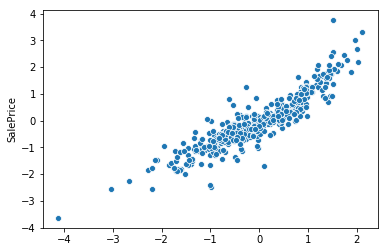

Text(0.5, 0, 'Residuals')

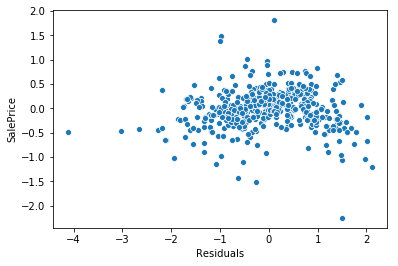

In [30]:
se.scatterplot(ridge_pred, y_test)
plt.show()
se.scatterplot(ridge_pred, ridge_pred-y_test)
plt.xlabel('Residuals')

In [31]:
for i in zip(x_train.columns, ridge_reg.coef_):
    if i[1] >= 0.001:
        print(i)

('MSSubClass', 0.014749071755271027)
('LotArea', 0.10654037663654982)
('OverallQual', 0.03008562101984759)
('OverallCond', 0.14044718364697475)
('YearBuilt', 0.3252700653277846)
('YearRemodAdd', 0.15433827388278104)
('BsmtFinSF1', 0.04554674480399568)
('TotalBsmtSF', 0.07983328966603176)
('1stFlrSF', 0.1769598740118868)
('2ndFlrSF', 0.0060451902423671365)
('LowQualFinSF', 0.010554058280287654)
('GrLivArea', 0.30717644823215107)
('BsmtFullBath', 0.046144716268732795)
('HalfBath', 0.03574694893000615)
('TotRmsAbvGrd', 0.07414305509623247)
('Fireplaces', 0.0970913271040828)
('GarageArea', 0.011888935725719316)
('WoodDeckSF', 0.026086748751374084)
('OpenPorchSF', 0.029041631693663368)
('EnclosedPorch', 0.05383869115226801)
('3SsnPorch', 0.004448374870559426)
('ScreenPorch', 0.058392666588299356)
('YrSold', 0.014729591851587499)
('MSZoning_RL', 0.01688997934091666)
('MSZoning_RM', 0.015960788406669455)
('LotShape_IR1', 0.008180847516564565)
('LotShape_IR2', 0.016314369360473088)
('LandConto

As we can see from the results, we do not see the same issue of large coefficients when used to predict the test dataset. From the coefficients, we can see that there aren't large variables anymore. We can see that more variables have lower coefficients, closer to zero. This minimises the effects of variables that are not as important.

## Lasso Regression - L1 Regularisation

In [32]:
from sklearn.linear_model import LassoCV

In [33]:
lasso_reg = LassoCV(alphas=np.geomspace(0.005, 1, num=30), cv=3)

In [34]:
lasso_reg.fit(x_train, y_train)

LassoCV(alphas=array([0.005  , 0.006  , 0.00721, 0.00865, 0.01038, 0.01247, 0.01496,
       0.01796, 0.02156, 0.02589, 0.03108, 0.03731, 0.04478, 0.05376,
       0.06454, 0.07747, 0.093  , 0.11165, 0.13403, 0.16089, 0.19315,
       0.23186, 0.27834, 0.33414, 0.40112, 0.48152, 0.57805, 0.69392,
       0.83302, 1.     ]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [35]:
print('R-squared value:', lasso_reg.score(x_train, y_train))
print('MSE:', mean_squared_error(lasso_reg.predict(x_train), y_train))
print('alpha:', lasso_reg.alpha_)

R-squared value: 0.8385657469780561
MSE: 0.1631992649031179
alpha: 0.01246520180613189


Test Dataset

In [36]:
print('R-squared value:', lasso_reg.score(x_test, y_test))
print('MSE:', mean_squared_error(lasso_reg.predict(x_test), y_test))

R-squared value: 0.8433728067975979
MSE: 0.15228481910990305


In [37]:
lasso_pred = lasso_reg.predict(x_test)

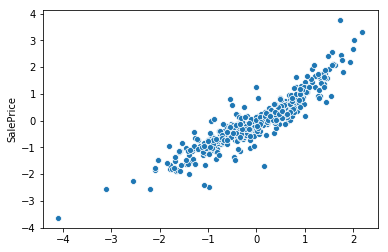

Text(0.5, 0, 'Residuals')

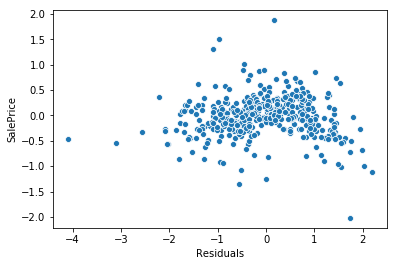

In [38]:
se.scatterplot(lasso_pred, y_test)
plt.show()
se.scatterplot(lasso_pred, lasso_pred-y_test)
plt.xlabel('Residuals')

In [39]:
print('Residuals Mean:', (lasso_pred-y_test).mean())

Residuals Mean: -0.019718602973905822


The mean of the residuals are a little skewed upwards showing a slight bias in the model.

In [40]:
print('Number of Variables:' , np.count_nonzero(lasso_reg.coef_))
for i in zip(x_train.columns, lasso_reg.coef_):
    if i[1 != 0]:       
        print(i)

Number of Variables: 22
('LotArea', 0.09727387191291337)
('OverallQual', 0.011585531231603085)
('OverallCond', 0.14962114547808691)
('YearBuilt', 0.36193563137448603)
('YearRemodAdd', 0.13355517086766405)
('BsmtFinSF1', 0.035614004361573845)
('BsmtFinSF2', -0.01631840934291622)
('TotalBsmtSF', 0.06605810208642177)
('1stFlrSF', 0.13937467020467306)
('GrLivArea', 0.42756240782864174)
('BsmtFullBath', 0.04717559360535544)
('HalfBath', 0.001110782612748393)
('KitchenAbvGr', -0.06277460535329416)
('TotRmsAbvGrd', 0.009236618956366034)
('Fireplaces', 0.08647209866567913)
('GarageArea', 0.005036838834941474)
('WoodDeckSF', 0.012532888191052473)
('OpenPorchSF', 0.008964339111524236)
('EnclosedPorch', 0.038538257326262364)
('ScreenPorch', 0.045473191236658515)
('PoolArea', -0.056309635360179716)
('MiscVal', -0.012578386362216129)


Similarly, the Lasso regression does not have the same large number phenomenon as seen in the linear regression.
As the Lasso regression is an L1 regularisation method, it does some sort of feature selection given that the variable coefficient can be reduced to 0. This is shown in the coefficient printout where there is not a much lower number of features included in the model.

## Elastic-Net Regression - L1 & L2 Regularisation

In [41]:
from sklearn.linear_model import ElasticNetCV

In [42]:
en_reg = ElasticNetCV(l1_ratio=np.geomspace(0.1,1, num=30), alphas=np.geomspace(0.01,1, num=30), cv=3)

In [43]:
en_reg.fit(x_train,y_train)

ElasticNetCV(alphas=array([0.01   , 0.01172, 0.01374, 0.0161 , 0.01887, 0.02212, 0.02593,
       0.03039, 0.03562, 0.04175, 0.04894, 0.05736, 0.06723, 0.0788 ,
       0.09237, 0.10826, 0.1269 , 0.14874, 0.17433, 0.20434, 0.2395 ,
       0.28072, 0.32903, 0.38566, 0.45204, 0.52983, 0.62102, 0.7279 ,
       0.85317, 1.     ]),
       copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.1    , 0.10826, 0.11721, 0.1269 , 0.13738, 0.14874, 0.16103,
       0.17433, 0.18874, 0.20434, 0.22122, 0.2395 , 0.25929, 0.28072,
       0.30392, 0.32903, 0.35622, 0.38566, 0.41753, 0.45204, 0.48939,
       0.52983, 0.57362, 0.62102, 0.67234, 0.7279 , 0.78805, 0.85317,
       0.92367, 1.     ]),
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [44]:
print('R-squared value:', en_reg.score(x_train, y_train))
print('MSE:', mean_squared_error(en_reg.predict(x_train), y_train))
print('alpha:', en_reg.alpha_)
print('l1_ratio:', en_reg.l1_ratio_)

R-squared value: 0.8387177395612938
MSE: 0.16304561053676886
alpha: 0.018873918221350976
l1_ratio: 0.6210169418915616


Test Data

In [45]:
print('R-squared value:', en_reg.score(x_test, y_test))
print('MSE:', mean_squared_error(en_reg.predict(x_test), y_test))

R-squared value: 0.8425848435635697
MSE: 0.15305093664100228


In [46]:
en_pred = en_reg.predict(x_test)

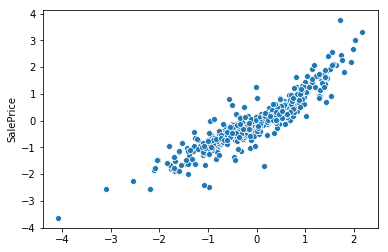

Text(0.5, 0, 'Residuals')

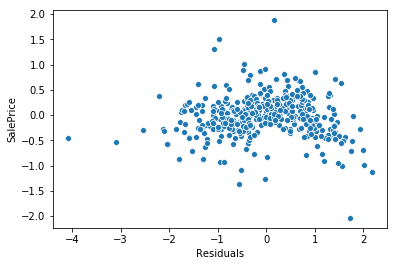

In [47]:
se.scatterplot(en_pred, y_test)
plt.show()
se.scatterplot(en_pred, en_pred-y_test)
plt.xlabel('Residuals')

In [48]:
print('Residuals Mean:', (en_pred-y_test).mean())

Residuals Mean: -0.01994244578390625


In [49]:
print('Number of Variables:' , np.count_nonzero(en_reg.coef_))
for i in zip(x_train.columns, en_reg.coef_):
    if i[1 != 0]:       
        print(i)

Number of Variables: 22
('LotArea', 0.0968899970338517)
('OverallQual', 0.012908907459280536)
('OverallCond', 0.14732312325505836)
('YearBuilt', 0.35645983128782127)
('YearRemodAdd', 0.1364188996193834)
('BsmtFinSF1', 0.036861039803412245)
('BsmtFinSF2', -0.01711769575125045)
('TotalBsmtSF', 0.06621368508335024)
('1stFlrSF', 0.14318730593860896)
('GrLivArea', 0.4124099857760205)
('BsmtFullBath', 0.047032469818284295)
('HalfBath', 0.005274788995537921)
('KitchenAbvGr', -0.06335498971180477)
('TotRmsAbvGrd', 0.018281622822152555)
('Fireplaces', 0.08799809401013127)
('GarageArea', 0.005078174798466117)
('WoodDeckSF', 0.014301988956101089)
('OpenPorchSF', 0.011302141697050044)
('EnclosedPorch', 0.03901329141672677)
('ScreenPorch', 0.04632898891464417)
('PoolArea', -0.05637708168610437)
('MiscVal', -0.01344389944919049)


The results for the Elastic-Net Regression is the same as the Lasso Regression results. While grid searching through the l1-ratio, the algorithm found that the results are optimised where l1-ratio = 1. This means that the model is sole penalised by a L1 penalty. As such, the elastic net regression becomes a lasso regression. This can be seen by the same alpha value as well. 

## Final results comparison and Conclusion

Do note that I excluded the large numbers from the linear regression to produce a score for it.

In [50]:
print('Linear Regression R-squared:', np.corrcoef(lin_pred_test1, y_test1)[0][1]**2)
print('Ridge Regression R-squared:', ridge_reg.score(x_test, y_test))
print('Lasso Regression R_squared:', lasso_reg.score(x_test, y_test))
print('Elastic-Net Regression R_squared:', en_reg.score(x_test,y_test))


Linear Regression R-squared: 0.7816485450347996
Ridge Regression R-squared: 0.8265199257533747
Lasso Regression R_squared: 0.8433728067975979
Elastic-Net Regression R_squared: 0.8425848435635697


From all the different models, we can see that the R-squared values do not differ much among them (+- 0.02).

In [51]:
print('Linear Regression MSE:', mean_squared_error(lin_pred_test1, y_test1))
print('Ridge Regression MSE:', mean_squared_error(ridge_pred, y_test))
print('Lasso Regression MSE:', mean_squared_error(lasso_pred, y_test))
print('Elastic-Net Regression MSE:', mean_squared_error(en_pred, y_test))

Linear Regression MSE: 0.20406839072639307
Ridge Regression MSE: 0.16867046638370514
Lasso Regression MSE: 0.15228481910990305
Elastic-Net Regression MSE: 0.15305093664100228


Similarly, we do not see drastic difference between the different models as well in terms of MSE.
However, we should conclude that a model is superior to the other. In this case, I chose the Lasso/ Elastic-Net Regression model (Both are similar given how the Elastic-Net resulted in a l1-ratio of 1). Although it only had a slight advantage in terms of the R-Squared and MSE scoring values, it did so with a much lower number of variables as compared to the others. This shows that the algorithm was able to produce a slightly better prediction despite having much lesser information.

Winner: Lasso/ Elastic-Net Regression